In [42]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("SVMtrain.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [6]:
survive = df[df['Survived'] == 1]
total = df.shape[0]
entries = survive.shape[0]

print("Total Passengers: ",total)

print("Survivors: ",entries)

Total Passengers:  889
Survivors:  340


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
df.fillna("Caption", inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


# Visulaization

C:\Users\shiva\AppData\Local\Temp\ipykernel_3292\2347463317.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot=True);


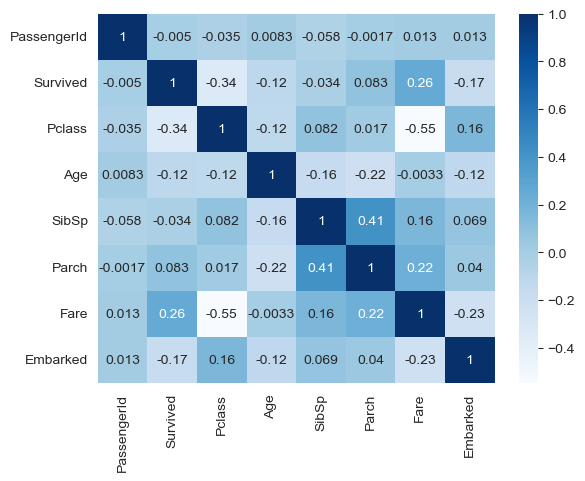

In [44]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.heatmap(df.corr(),cmap='Blues',annot=True);

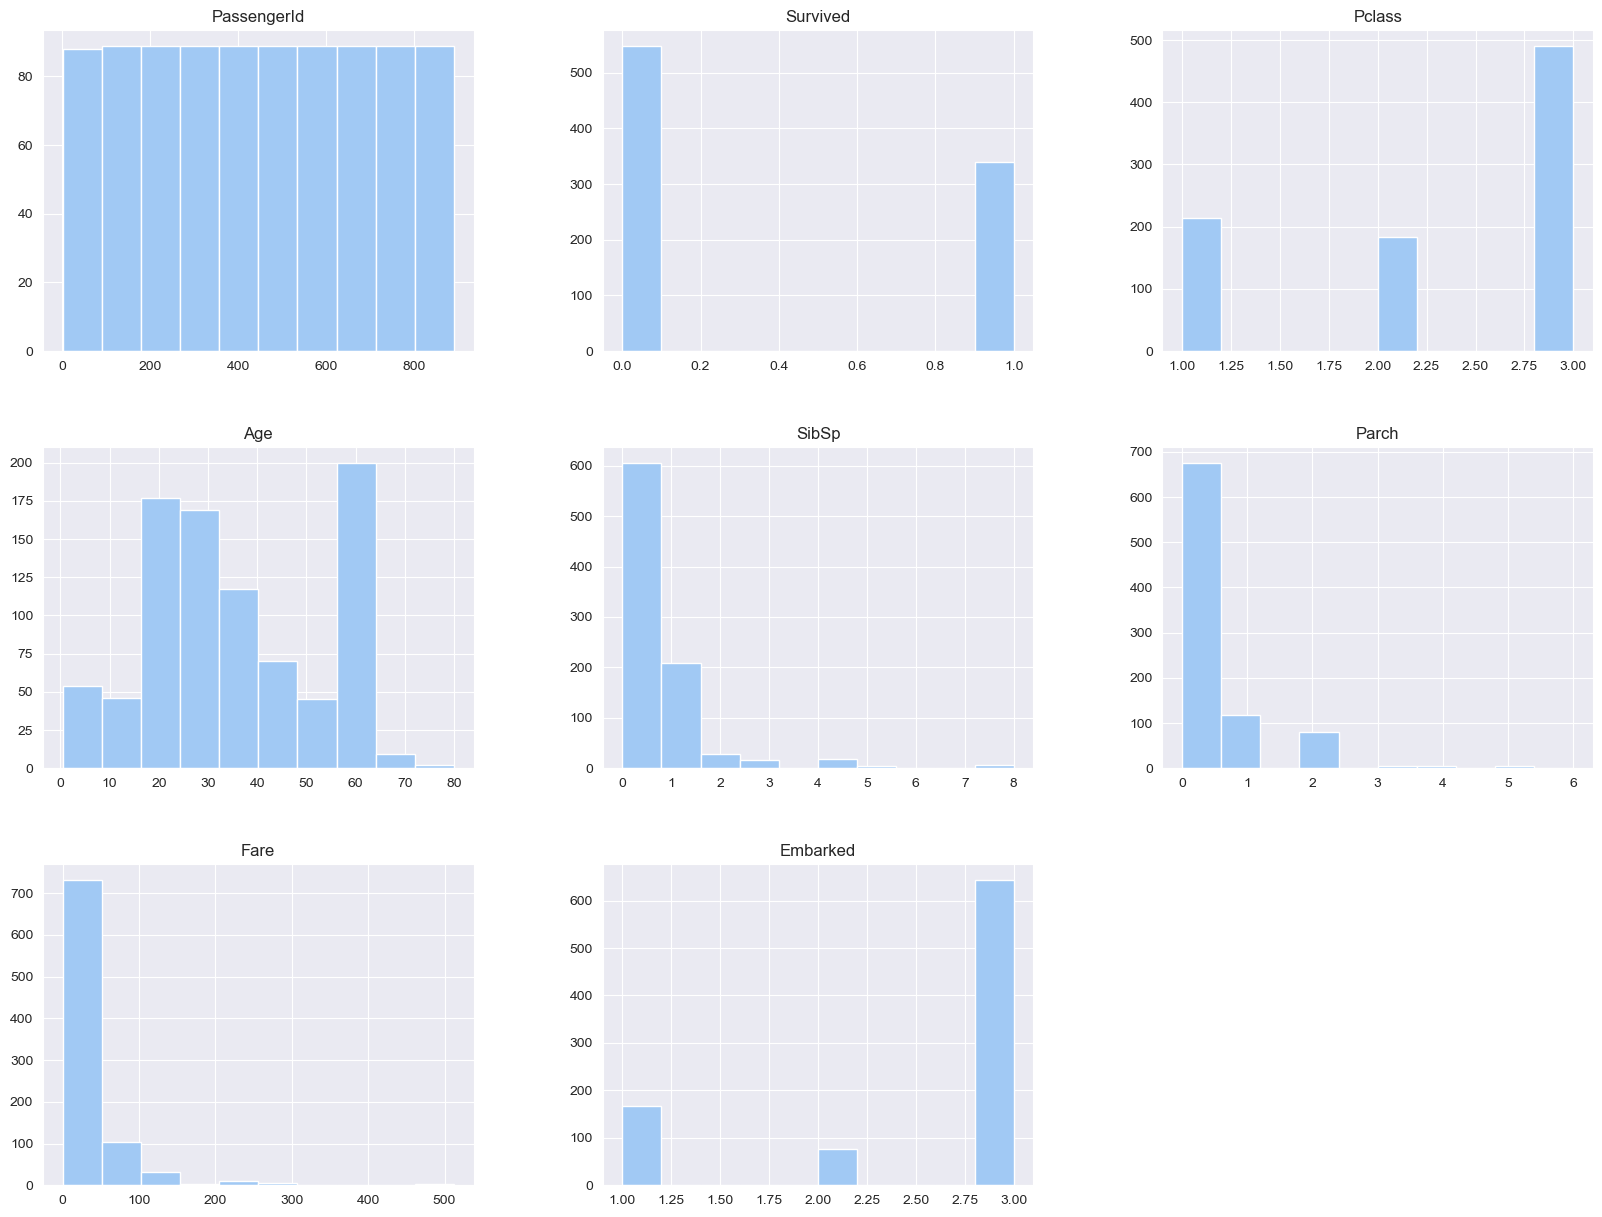

In [21]:
df.hist(figsize = (20,15))
plt.show()

In [22]:
x = df[['Age']]
y = df[['Survived']]

<Axes: >

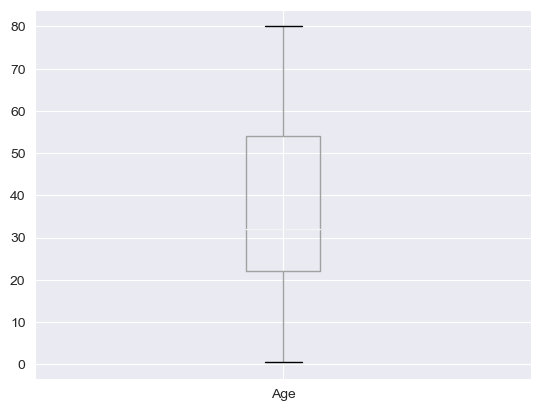

In [24]:
x.boxplot()

<Axes: >

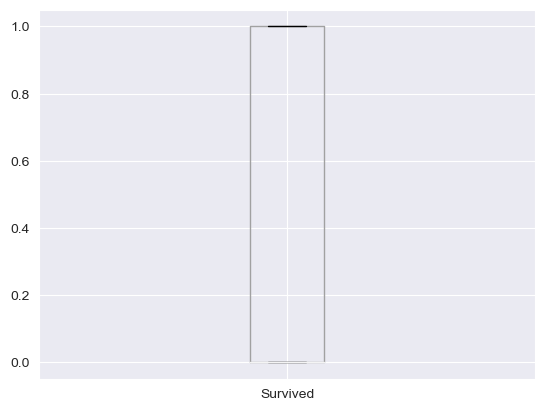

In [25]:
y.boxplot()

In [29]:
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2)

In [32]:
lr = LinearRegression()

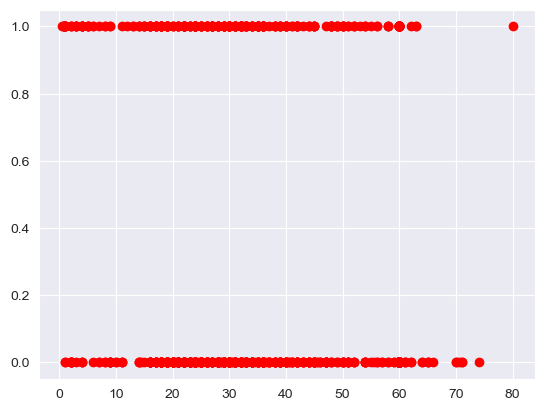

In [36]:
lr.fit(x_train, y_train)
plt.scatter(df['Age'], df['Survived'], color = 'red')
plt.show()

In [37]:
y_pred = lr.predict(x_test)

In [38]:
y_test.head()

,Survived
705,1
250,0
759,0
847,1
369,1


In [39]:
y_pred[0:5]

array([[0.34809232],
       [0.3961412 ],
       [0.30304648],
       [0.30304648],
       [0.40815342]])

In [40]:
mean_squared_error(y_test, y_pred)

0.2373971805351804

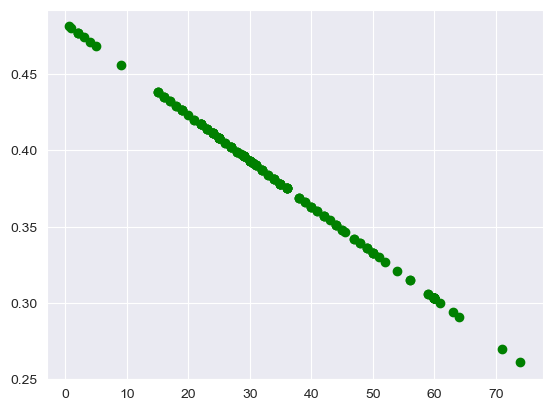

In [41]:
plt.scatter(x_test, y_pred, color = 'g')
plt.show()

# Insights of Data Set

### In this dataset we have a features PassengerId, Survived, Pclass, Sex,	Age, SibSp,	Parch,	Fare,	Embarked.  

### Here x= "Age", y = "Survived" and mean squared error = 0.2373971805351804. 

### I have used Linear Regression for this.